In [12]:
import os
import glob
from collections import Counter, defaultdict
import pandas as pd

import omop_analyze
import s4s_analyze

original_path = os.getcwd()

def omop_formatted(tables):
    return {filename: len(table) for filename, table in tables.items()}
    
def s4s_formatted(counts):
    return {k: len(v) for k, v in counts.items()}

def filter_matches(omop_tables, s4s_uniques):
    return filter_procedures(omop_tables, s4s_uniques)

def filter_procedures(omop_tables, s4s_uniques):
    return omop_tables, s4s_uniques

In [25]:
omop_data_types = ['condition', 'observation', 'procedure']
omop_people = omop_analyze.parse_omop()
#combine observation_1 and observation_2
for person, data_types in omop_people.items():
    if 'observation_1.csv' in data_types.keys():
        data_types['observation.csv'] = data_types['observation_1.csv']
        del data_types['observation_1.csv']
        if 'observation_2.csv' in data_types.keys():
            data_types['observation.csv'].append(data_types['observation_2.csv'])
            del data_types['observation_2.csv']
    elif 'observation_2.csv' in data_types.keys():
        data_types['observation.csv'] = data_types['observation_2.csv']
        del data_types['observation_2.csv']
print("Got {} omop participants".format(len(omop_people.keys())))


['condition.csv', 'observation_1.csv', 'observation_2.csv', 'procedure.csv']
Got 72 omop participants


condition has 46 people with zero entries
observation has 0 people with zero entries
procedure has 45 people with zero entries


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000236CA588>,
      dtype=object)

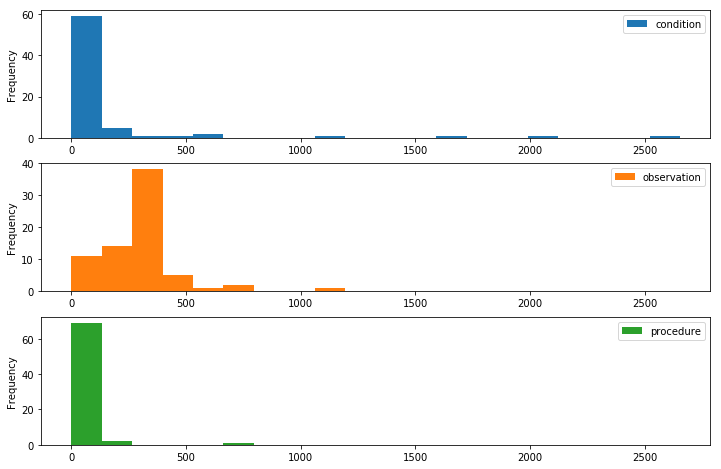

In [56]:
# Histogram showing counts for each OMOP data type, across the population. E.g., how many patients with 0 Conditions; 1-10; etc. (Ranges will be determined by the actual data distribution.)
omop_data_types_per_person = {data_type: [len(person[data_type+'.csv']) if data_type+'.csv' in person.keys() else 0 for person in omop_people.values()] for data_type in omop_data_types}
omop_df_types = pd.DataFrame(omop_data_types_per_person, index=omop_people.keys())
for data_type, counts in omop_data_types_per_person.items():
    print("{} has {} people with zero entries".format(data_type, counts.count(0)))
omop_df_types.plot(kind='hist', bins=20, subplots=True, sharex=False, figsize=(12, 8))

In [55]:
# Count of standardized code *systems* for each OMOP data type. E.g., fraction of SNOMED vs LOINC vs Other codes found in condition_concept_id.
vocabulary_sources = Counter()
for person, tables in omop_people.items():
    for filename, incidents in tables.items():
        for incident in incidents:
            vocabulary_sources[filename + '-' + incident['source_vocabulary']] += 1
vocabulary_sources

Counter({'condition.csv-ICD10CM': 7212,
         'condition.csv-ICD9CM': 4051,
         'observation_2.csv-PPI': 4323,
         'observation_2.csv-None': 4254,
         'procedure.csv-CPT4': 1287,
         'procedure.csv-ICD10CM': 186,
         'observation_1.csv-PPI': 4690,
         'observation_1.csv-None': 7852,
         'procedure.csv-ICD10PCS': 202,
         'procedure.csv-ICD9CM': 225,
         'observation_1.csv-ICD10CM': 129,
         'procedure.csv-ICD9Proc': 97,
         'observation_1.csv-ICD9CM': 119,
         'observation_2.csv-ICD9CM': 87,
         'observation_2.csv-ICD10CM': 18,
         'procedure.csv-HCPCS': 23})

In [ ]:
# Count of non-standardized code *systems* for each OMOP data type. E.g., fraction of SNOMED vs LOINC vs Other codes found in condition_source_concept_id

In [ ]:
# Top N standardized codes for each data category. E.g., what were the top 10 Conditions?
standardized_codes = Counter()
for person, tables in omop_people.items():
    for filename, incidents in tables.items():
        for incident in incidents:
            vocabulary_sources[filename + '-' + incident['source_vocabulary']] += 1
vocabulary_sources

In [ ]:
# For each OMOP column, how often was a value present vs absent? 

In [ ]:
# For each OMOP column representing a status flag, what is the distribution of values? E.g., for condition_status_concept_id, what values appear and what are their counts? This should be presented by vocabulary name + concept, not by integer "concept_id".

In [ ]:
# omop_people_stats = {}
# for person, tables in omop_people.items():
#     omop_people_stats[person] = {}
#     for filename, incidents in tables.items():
#         omop_people_stats[person][filename] = [
#             incident[omop_analyze.important_column[filename]]
#             for incident in incidents
#         ]

In [ ]:
s4s_people_stats = {}
total_counts = defaultdict(lambda: defaultdict(list))      
search_path = os.path.join(original_path, 'fhir', 'Participant', '*', 'SyncForScience')
for directory in glob.glob(search_path):
    base_uri, dir_counts = s4s_analyze.process_directory(directory)
    person_id = directory.split('\\')[-2][1:]
    s4s_people_stats[person_id] = dir_counts
print("got {} s4s participants".format(len(s4s_people_stats.keys())))

In [ ]:
# for person, tables in omop_people_stats.items():
#     # print("OMOP: {}\nMatching S4S: {}\n".format(omop_formatted(tables), s4s_formatted(s4s_people_stats[person])))
#     print("Patient: {}\n{}\n".format(person, filter_procedures(tables, s4s_people_stats[person])))

In [ ]:
s4s_df = pd.DataFrame(s4s_people_stats)
s4s_df